# DSTEP20 // Assignment #1 **SOLUTIONS**

assigned : **Jan 7, 2020**

DUE : **Jan 14, 2020 11:59pm**

## When will New Castle Battery Park be underwater?

![alt text](https://lh5.googleusercontent.com/p/AF1QipNu7_-CRmvQTqI7m_V693kOu_IzeeDVYw2Do2UT=w408-h306-k-no)

---

**READING**

You won't be quizzed or tested on readings for this class, but they can be invaluable for learning through example how to think, write, and reason like a Data Scientist!

1. [CMU Metro 21 Project with Pittsburgh Bureau of Fire Report](http://michaelmadaio.com/Metro21_FireRisk_FinalReport.pdf) - especially the Executive Summary.

2. The [first](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/) and [second](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) blog posts about bike share usage in Seattle from Jake van der Plas's *Pythonic Perambulations* blog. <br> **NOTE: the goal here is not to understand all of the python code, but rather to get a sense of what data storytelling is and the kinds of language and inferential thinking used in data science.**


---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  The satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial and temporal coverage, but prior to satellite altimetry, were the only real method for measuring sea level. 

There are three main goals of this assignment:

1. accessing and working with a century of sea level data
2. fitting linear models to that data for estimates of the rate of sea level rise
3. comparing multiple models for prediction of future sea level

<u>**Instructions for tasks that will be graded are in bold below.**</u>

### PART 1 - Background

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>
Provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future.  Potential topics to consider and address include:

1. description of historical sea level measurements
  
2. what open satellite data exist and where they can be located

3. characteristic numbers for sea level measurements over time

4. why sea level might change as the climate changes

5. variation in sea level rise across the globe

6. what projections exist for the future of sea level rise

7. how coastal communities are mitigating the consequences of sea level rise

8. potential economic costs of sea level rise

9. potential social costs of sea level rise

Please include *references* within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).
</b>

TEXT FOR ANSWER HERE.

### PART 2 - Loading and plotting the data

The NOAA data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV.</b>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [0]:
# -- read in the data
fname = "https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv"
csiro = pd.read_csv(fname)

<b>Take the <u>minimum</u> across the "CSIRO Adjusted Sea Level" and "NOAA Adjusted Sea Level" colmuns and add it to the DataFrame as a column called "min_level".</b>

In [0]:
# -- set the column names
cols = ["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]

# -- take minimum across the columns
csiro["min_level"] = csiro[cols].min(axis=1)

<b>The CSIRO sea level data is in inches.  Convert the min_level column to millimeters.</B>

In [0]:
# -- conversion factor from inches to millimeters is 25.4
csiro["min_level"] = csiro["min_level"] * 25.4

Notice that the CSIRO time data is actually a string and includes months and dates.  **Use the cell below to create a column called "year_int" that is the CSIRO year as an integer so that we don't have to worry about the months and dates from now on.**

In [0]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]

**Make a plot of the sea-level as a function of time.**

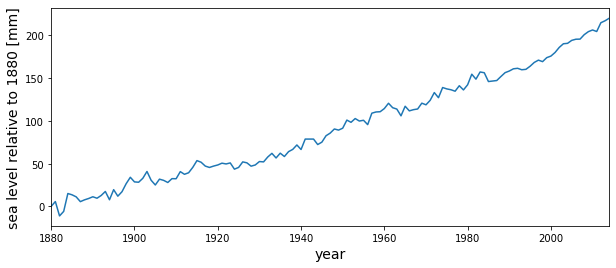

In [0]:
# -- make the plot (setting figure size and turning off the legend)
ax = csiro.plot("year_int", "min_level", legend=False, figsize=[10, 4])

# -- precisely label the axes in a fontsize that is readable
xlab = ax.set_xlabel("year", fontsize=14)
ylab = ax.set_ylabel("sea level relative to 1880 [mm]", fontsize=14)

**Describe what information is conveyed by this plot.** <small> i.e, write a caption for the plot. </small>

TEXT FOR YOUR ANSWER HERE

### PART 3 - Fitting a linear model

As we did in class, your goal here is to estimate the rate of sea level rise.  However, we now have a much longer <i>temporal baseline</i>.

<b>Using the statsmodels api, fit a linear model to the data:</b>

${\rm sea~level} = a_1 \times {\rm time} + a_0$

In [0]:
# -- define the model
model = sm.ols("min_level ~ year_int", data=csiro)

# -- fit the model
result = model.fit()

<b>What is the rate of sea level rise that you find with this linear model fit to the CSIRO data?</b>

In [0]:
# -- get the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6040.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          1.03e-112
Time:                        20:11:03   Log-Likelihood:                -488.45
No. Observations:                 135   AIC:                             980.9
Df Residuals:                     133   BIC:                             986.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2943.6655     39.074    -75.335      0.0

In [0]:
# -- the rate of sea level rise is the coefficient in front of 
#    year_int, 1.5594 mm/yr.  This can also be accessed directly from the 
#    fit results object.
y_intercept = result.params[0]
slr = result.params[1]

# -- print the result
print("the rate of sea level rise from 1880 to 2014 is {0:4.3} mm/yr".format(slr))

the rate of sea level rise from 1880 to 2014 is 1.56 mm/yr


**Plot the CSIRO data with your best fit linear model overlaid.**

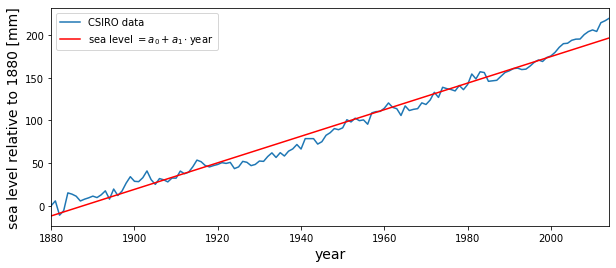

In [0]:
# -- use the fit to predict the year_int values
pred = result.predict(csiro)

# -- make the plot (setting figure size and turning off the legend)
ax = csiro.plot("year_int", "min_level", label="CSIRO data", figsize=[10, 4])

# -- add the linear fit
ltxt = "sea level $ = a_0  + a_1 \cdot$year"
ax.plot(csiro["year_int"], pred, color="red", label=ltxt)
ax.legend()


# -- precisely label the axes in a fontsize that is readable
xlab = ax.set_xlabel("year", fontsize=14)
ylab = ax.set_ylabel("sea level relative to 1880 [mm]", fontsize=14)

**Describe what information is conveyed by this plot.**

**Would you consider this model a "good" fit to the data?  Why or why not?**

TEXT FOR ANSWER HERE.

### PART 4 - Comparing Multiple Model Predictions

Let's expand the model that we're using to fit the data by adding a quadratic term.  In this part, you will compare the two model fits and use each to predict when Newcastle Battery Park will be under water due to rising sea level.

**Using the statsmodels api, fit a model to the CSIRO data that includes both a linear and quadratic dependence on time.**

In [0]:
# -- create the model
model2 = sm.ols("min_level ~ np.power(year_int, 2) + year_int", data=csiro)

# -- fit the data
result2 = model2.fit()

# -- summarize the results
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7074.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          5.54e-135
Time:                        20:11:03   Log-Likelihood:                -431.32
No. Observations:                 135   AIC:                             868.6
Df Residuals:                     132   BIC:                             877.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.607e+

**Plot the CSIRO data with both the linear model and quadratic model overlaid.**

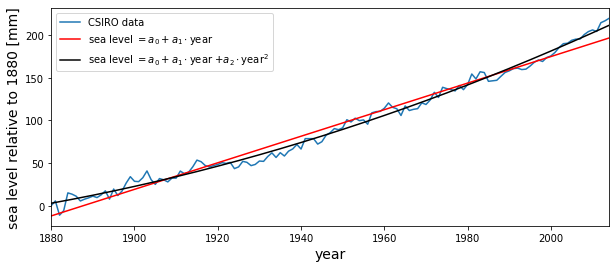

In [0]:
# -- use the fit to predict the year_int values
pred2 = result2.predict(csiro)

# -- make the plot (setting figure size and turning off the legend)
ax = csiro.plot("year_int", "min_level", label="CSIRO data", figsize=[10, 4])

# -- add the linear fit
ltxt = "sea level $ = a_0  + a_1 \cdot$year"
ax.plot(csiro["year_int"], pred, color="red", label=ltxt)

# -- add the quadratic fit
qtxt = "sea level $ = a_0  + a_1 \cdot$year $ + a_2 \cdot$year$^2$"
ax.plot(csiro["year_int"], pred2, color="black", label=qtxt)

# -- add the legend
ax.legend()

# -- precisely label the axes in a fontsize that is readable
xlab = ax.set_xlabel("year", fontsize=14)
ylab = ax.set_ylabel("sea level relative to 1880 [mm]", fontsize=14)

**Describe what information is conveyed by this plot.**

TEXT FOR YOUR ANSWER HERE

**Determine the probability that the quadratic model is a better fit to the data using a likelihood ratio test.**

In [0]:
# -- perform likelihood ratio test
lr, pval, df = result2.compare_lr_test(result)

print("likelihood ratio, p-value : {0}, {1}".format(lr, pval))

likelihood ratio, p-value : 114.25307827139568, 1.146948766307778e-26


The probability that adding the quadratic term results in a likelihood ratio of 114.25 by random chance is $10^{-26}$ indicating that the null hypothesis (that the underlying process generating the data is better described by a linear model than a quadratic model) is rejected.

**Using Google Earth to determine the elevation of New Castle Battery Park, in what year will it be under water due to rising sea level?** 

In [0]:
# -- set the altitude of Newcastle Battery Park
ele = 2000. # millimeters

# -- determine the current sea level from the two models
sl_2020_mod1 = result.predict({"year_int" : 2020}).iloc[0]
sl_2020_mod2 = result2.predict({"year_int" : 2020}).iloc[0]

# -- trial and error to determine year for model 1
year_uw1 = 3303
sl_uw_mod1 = result.predict({"year_int" : year_uw1}).iloc[0]

# -- trial and error to determine year for model 2
year_uw2 = 2464
sl_uw_mod2 = result2.predict({"year_int" : year_uw2}).iloc[0]

# -- print results
print("LINEAR MODEL")
print("New Castle Battery Park elevation in 2020 is {0} mm".format(ele + sl_2020_mod1))
print("and sea level will be {0} mm in {1}".format(sl_uw_mod1, year_uw1))
print("")
print("QUADRATIC MODEL")
print("New Castle Battery Park elevation in 2020 is {0} mm".format(ele + sl_2020_mod2))
print("and sea level will be {0} mm in {1}".format(sl_uw_mod2, year_uw2))

LINEAR MODEL
New Castle Battery Park elevation in 2020 is 2206.271636643223 mm
and sea level will be 2206.9495202572816 mm in 3303

QUADRATIC MODEL
New Castle Battery Park elevation in 2020 is 2225.3881367315553 mm
and sea level will be 2232.007843829917 mm in 2464


**Summarize your findings throughout this notebook.  What are the key take aways from your analysis?  What are some of the shortcomings, potential biases, inaccuracies, assumptions, or approximations that you have made through out? (No more than 500 words)**

TEXT FOR YOUR ANSWER HERE.

---

**EXTRA CREDIT - Local Effects**

Notice this image:

![alt text](https://md.water.usgs.gov/gage_images/01482170.JPG)

That is a picture of a tide gauge in New Castle Battery Park.  So far we've been using global sea level as a data set for predicting when Battery Park will be underwater, but the rate of sea level rise is known to vary with location.  The USGS provides data going back to 2012.  Using the New Castle tide gauge data available from USGS, how would your answers about when New Castle Battery Park will be underwater change?$^{\dagger}$

<small><i>$^{\dagger}$ Note, this "Extra Credit" section is significantly more tricky than the previous sections! </i></small>

Data can be found [here](https://waterdata.usgs.gov/de/nwis/uv/?site_no=01482170&PARAmeter_cd=00065,00060,62615,62620).

In [0]:
# -- set the data location
fname = "https://nwis.waterdata.usgs.gov/de/nwis/uv/?cb_00065=on&format=rdb&site_no=01482170&period=&begin_date=2012-04-05&end_date=2020-01-18"

# -- read the data setting the separator to a tab, skipping the header, 
#    setting the column names in place, parsing datetime columns, and setting 
#    low_memory=False
dsl = pd.read_csv(fname, sep="\t", skiprows=29, header=None, 
                  names=["agency_name", "site_no", "datetime", "timezone", 
                         "height",  "data_provisionality"], low_memory=False, 
                  parse_dates=True)

In [0]:
# -- convert datetime column to datetime
dsl["datetime"] = pd.to_datetime(dsl["datetime"])

In [0]:
# -- set the decimal year for each day (note we will have multiple measurements 
#    per day)
dsl["year"] = dsl["datetime"].dt.year + (dsl["datetime"].dt.dayofyear - 1) / 365.

In [0]:
# -- convert height to mm
dsl["height"] = dsl["height"] * 12. * 25.4

In [0]:
# -- only use data that is accepted, not provisional
dsl = dsl[dsl["data_provisionality"] == "A"]

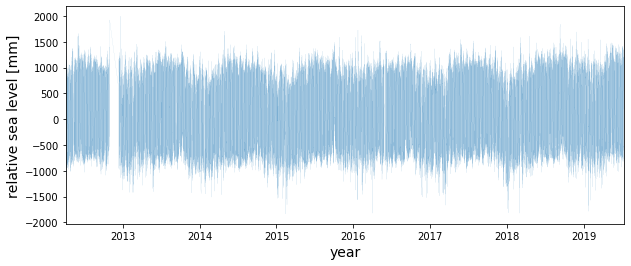

In [0]:
# -- plot the raw data
ax = dsl.plot("year", "height", lw=0.05, figsize=(10, 4), legend=False)
xlab = ax.set_xlabel("year", fontsize=14)
ylab = ax.set_ylabel("relative sea level [mm]", fontsize=14)

In [0]:
# -- fit two models
dmodel1 = sm.ols("height ~ year", data=dsl)
dmodel2 = sm.ols("height ~ np.power(year, 2) + year", data=dsl)
dres1   = dmodel1.fit()
dres2   = dmodel2.fit()

In [0]:
# -- print R^2 for two models
print("linear model R^2    : {0}".format(dres1.rsquared))
print("quadratic model R^2 : {0}".format(dres2.rsquared))

linear model R^2    : 0.0006532048051212103
quadratic model R^2 : 0.0025333185427435234


(NOTE: $R^2$ is <u>very</u> low... but let's press on)

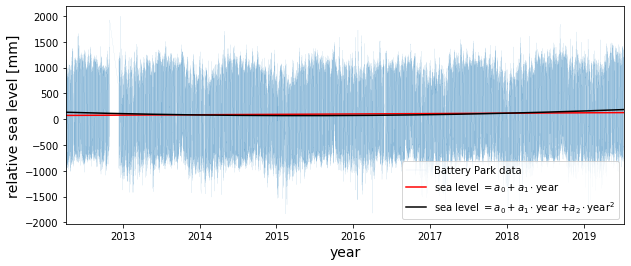

In [0]:
# -- overplot the two models
# -- use the fit to predict the year values
dpred1 = dres1.predict(dsl)
dpred2 = dres2.predict(dsl)

# -- make the plot (setting figure size and turning off the legend)
ax = dsl.plot("year", "height", label="Battery Park data", figsize=[10, 4], lw=0.05, legend=False)

# -- add the linear fit
ltxt = "sea level $ = a_0  + a_1 \cdot$year"
ax.plot(dsl["year"], dpred1, color="red", label=ltxt)

# -- add the quadratic fit
qtxt = "sea level $ = a_0  + a_1 \cdot$year $ + a_2 \cdot$year$^2$"
ax.plot(dsl["year"], dpred2, color="black", label=qtxt)

# -- add the legend
ax.legend(loc="lower right")

# -- precisely label the axes in a fontsize that is readable
xlab = ax.set_xlabel("year", fontsize=14)
ylab = ax.set_ylabel("relative sea level [mm]", fontsize=14)

In [0]:
# -- assume Google Earth elevation data is from Jan 1st

# -- set the altitude of Newcastle Battery Park
ele = 2000. # millimeters

# -- determine the current sea level from the two models
dsl_2020_mod1 = dres1.predict({"year" : 2020}).iloc[0]
dsl_2020_mod2 = dres2.predict({"year" : 2020}).iloc[0]

# -- trial and error to determine year for model 1
year_uw1 = 2286
dsl_uw_mod1 = dres1.predict({"year" : year_uw1}).iloc[0]

# -- trial and error to determine year for model 2
year_uw2 = 2033
dsl_uw_mod2 = dres2.predict({"year" : year_uw2}).iloc[0]

# -- print dres1s
print("LINEAR MODEL")
print("New Castle Battery Park elevation in 2020 is {0} mm".format(ele + dsl_2020_mod1))
print("and sea level will be {0} mm in {1}".format(dsl_uw_mod1, year_uw1))
print("")
print("QUADRATIC MODEL")
print("New Castle Battery Park elevation in 2020 is {0} mm".format(ele + dsl_2020_mod2))
print("and sea level will be {0} mm in {1}".format(dsl_uw_mod2, year_uw2))

LINEAR MODEL
New Castle Battery Park elevation in 2020 is 2132.5813014140804 mm
and sea level will be 2136.741076118802 mm in 2286

QUADRATIC MODEL
New Castle Battery Park elevation in 2020 is 2216.409144565463 mm
and sea level will be 2182.296678736806 mm in 2033


---